# Numerical Integration

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

%matplotlib inline

Define the fucntion and plot it

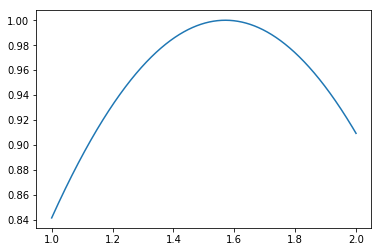

In [8]:
def f(x):
    return np.sin(x)


def plotf(f, a, b, n):
    x = [i for i in np.linspace(a, b, n)]
    y = [f(i) for i in x]
    plt.plot(x,y)
    plt.show()

    
plotf(f, 1, 2, 100000)

## Trapezoidal Rule

https://en.wikipedia.org/wiki/Trapezoidal_rule

![Eq](https://wikimedia.org/api/rest_v1/media/math/render/svg/91f34f64b9957e3af4999ca440682e52d6300802)

In [6]:
def trap(f, a, b, n):
    x_values = np.linspace(a, b, n)
    dx = x_values[1] - x_values[0]
    sum_of_first_and_last = (f(a) + f(b))*dx/2
    inner_values = [f(l) for l in x_values[1:-1]]
    return (sum_of_first_and_last/2+sum(inner_values))*dx

n = 100000
ans = trap(f, 1, 2, n)
print("Answer from my function with ", n, " slices =", ans)
print("Answer from SciPy library")
scipy_ans = quad(f, 1, 2)
print("Result = ", scipy_ans[0])
print("Absolute Error", scipy_ans[1])

Answer from my function with  100000  slices = 0.9564403885178399
Answer from SciPy library
Result =  0.956449142415282
Absolute Error 1.0618718597924315e-14


## Simpson's Rule

https://en.wikipedia.org/wiki/Simpson's_rule

In [20]:
def simpson(f, a, b, n):
    xs = np.linspace(a, b, n)
    dx = xs[1] - xs[0]
    s = (f(a) + f(b))
    evens = [f(xs[l]) for l in range(2, n-1, 2)]
    odds = [f(xs[l]) for l in range(3, n-1, 2)]
    print("f[first]", f(a))
    print("f[last]", f(b))
    print("Even terms")

    for t in evens:
        print(t)

    print("Odd terms")
    for t in odds:
        print(t)

    return (s + 4*sum(evens) + 2*sum(odds))*dx/3


In [26]:
n = 7
ans = simpson(f, 1, 2, n)

print("Answer from my function with ", n, " slices =", ans)
print("Answer from SciPy library")
scipy_ans = quad(f, 1, 2)
print("Result = ", scipy_ans[0])
print("Absolute Error", scipy_ans[1])

f[first] 0.8414709848078965
f[last] 0.9092974268256817
Even terms
0.9719379013633127
0.9954079577517649
Odd terms
0.9974949866040544
0.9657346537574998
Answer from my function with  7  slices = 0.7525895071565002
Answer from SciPy library
Result =  0.956449142415282
Absolute Error 1.0618718597924315e-14


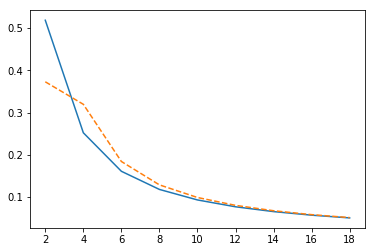

In [12]:
x = [i for i in range(2, 20, 2)]
ref = quad(f, 1, 2)[0]
y_t = [ref - trap(f, 1, 2, i) for i in x]
y_s = [ref - simpson(f, 1, 2, i) for i in x]

plt.plot(x,y_t, x, y_s, '--')
# plt.bar(x, y_t, x, y_s)